<a href="https://colab.research.google.com/github/AyaElshazly/Applied-Machine-Learning/blob/main/Group4_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsRestClassifier
from sklearn import linear_model

In [ ]:
X_Train = np.array([[1.3, 3.3], [1.4, 2.5], [1.8, 2.8], [1.9, 3.1], [1.5, 1.5], [1.8, 2], [2.3, 1.9], [2.4, 1.4], [2.4, 2.4], [2.4, 3], [2.7, 2.7], [2.3, 3.2]])
Y_Train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

X_Test = np.array([[1.7, 2.5], [1.9, 2.7], [2, 2.15], [2.4, 2], [2.2, 3.25], [2.4, 2.25]])

Y_Test = np.array([0, 0, 1, 1, 2, 2])


## **General function for decision boundary**

In [ ]:
def plot_decision_boundary(clf, X, y):
  # Create a mesh grid to plot the decision boundary
  h = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Predict the class labels for the mesh grid
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the decision boundaries and the data points
  plt.contourf(xx, yy, Z,  alpha=0.6, cmap=plt.cm.Paired)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('X-Label')
  plt.ylabel('Y-Label')
  plt.title('Decision boundaries')
  plt.show()

## **General function for confusion function**

In [ ]:
def conff_matrix(conf_matrix):
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.8)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

## **Generate 3 samples from Y_Test**

In [ ]:
n=0

def define_target_class(Y_Target_C, n):
  Y_Target_C = np.where(Y_Target_C == n, 1, 0)
  # print("Y-",Y_Target_C)
  return Y_Target_C

for i in range(3):
  define_target_class(Y_Test,n)
  n = n+1


In [ ]:
define_target_class(Y_Test,1)

array([0, 0, 1, 1, 0, 0])

## **Generate 3 samples from Y_Train**

In [ ]:
n=0
for i in range(3):
  define_target_class(Y_Train,n)
  n = n+1

#**(a) Default SVM**

## **Implement a default SVM classifier, apply training and obtain confusion matrix**

Confusion matrix for training dataset:
 [[4 0 0]
 [0 4 0]
 [0 0 4]]
Confusion matrix for test dataset:
 [[2 0 0]
 [0 2 0]
 [0 0 2]]


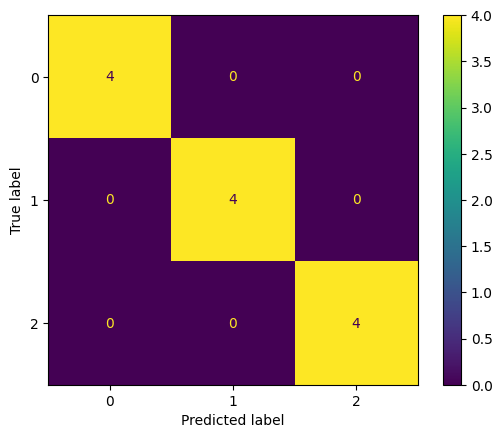

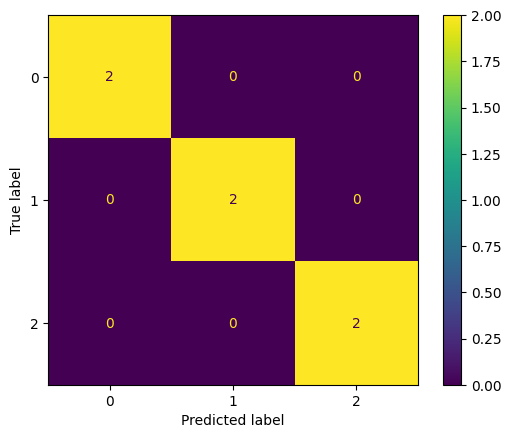

In [ ]:
# Define the SVM classifier with default parameters
clf = svm.SVC()

# Train the model using the training dataset
clf.fit(X_Train, Y_Train)

# Predict the target output for the training and test data
Y_Train_Pred = clf.predict(X_Train)
Y_Test_Pred = clf.predict(X_Test)

# Calculate the confusion matrices for the training and test datasets
confusion_matrix_train = confusion_matrix(Y_Train, Y_Train_Pred)
confusion_matrix_test = confusion_matrix(Y_Test, Y_Test_Pred)

# Print the confusion matrices
print("Confusion matrix for training dataset:\n",confusion_matrix_train)
# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_Train, Y_Train)
print("Confusion matrix for test dataset:\n",confusion_matrix_test)
# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_Test, Y_Test)

## **Visualize decision surfaces for the default SVM classifier**

<ipython-input-9-e9a83a05aed6>:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, cmap=plt.cm.Paired, edgecolors='k', s=100, marker='x', label='Test Data')


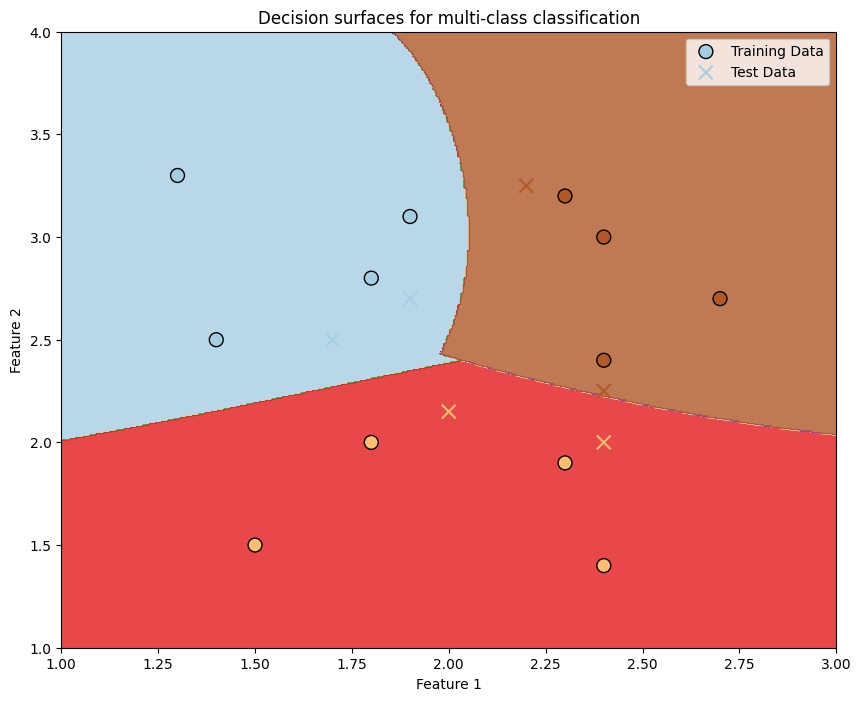

In [ ]:
# Create a mesh grid to plot the decision surfaces
xx, yy = np.meshgrid(np.linspace(1, 3, 500),
                     np.linspace(1, 4, 500))
# Predict the classes of the meshgrid points
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted classes to match the meshgrid
Z = Z.reshape(xx.shape)

# Plot the decision surfaces with different colors for each class
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train, cmap=plt.cm.Paired, edgecolors='k', s=100, label='Training Data')
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, cmap=plt.cm.Paired, edgecolors='k', s=100, marker='x', label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
Title = 'Decision surfaces for multi-class classification'
plt.title(Title)
plt.legend()
plt.show()

In [ ]:
svm_model = svm.SVC(decision_function_shape='ovr', probability=True)

#**(b-1) One-vs-Rest SVM**

## **Applying one-vs-rest strategy for SVM classifier, obtain and visualize confusion matrix and decision boundary**

In [ ]:
def OvR_svm(y_train, y_test):
    OvR_clf = svm_model.fit(X_Train, y_train)

    svm_pred_y_train = OvR_clf.predict(X_Train)
    svm_pred_y_test = OvR_clf.predict(X_Test)

    # print("Training accuracy: ", metrics.accuracy_score(y_train, svm_pred_y_train))
    cm1 = confusion_matrix(y_train, svm_pred_y_train)
    print("Confusion matrix for training set: \n", cm1)
    # ConfusionMatrixDisplay.from_estimator(svm_model, X_Train, y_train, cmap = 'Blues')
    conff_matrix(cm1)


    # print("Testing Accuracy: ", metrics.accuracy_score(y_test, svm_pred_y_test))
    cm2 = confusion_matrix(y_test, svm_pred_y_test)
    print("Confusion matrix for test set: \n", cm2)
    # disp = ConfusionMatrixDisplay.from_estimator(svm_model, X_Test, y_test, cmap = 'OrRd_r')
    conff_matrix(cm2)
    plot_decision_boundary(OvR_clf,X_Train, y_train)
    return Y_Test_Pred

## **Apply OvR_svm function for the the three classes**


 For class : 0
Confusion matrix for training set: 
 [[8 0]
 [0 4]]


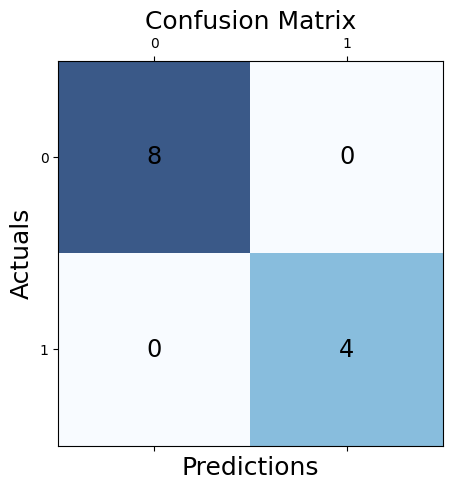

Confusion matrix for test set: 
 [[4 0]
 [0 2]]


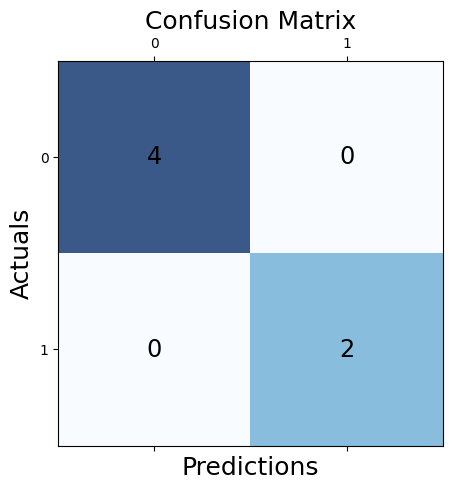

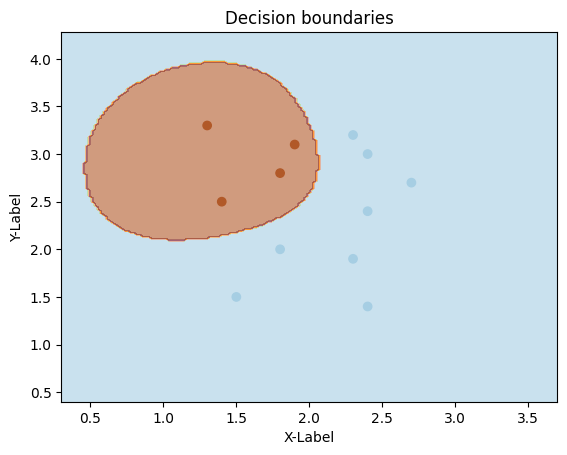


 For class : 1
Confusion matrix for training set: 
 [[8 0]
 [0 4]]


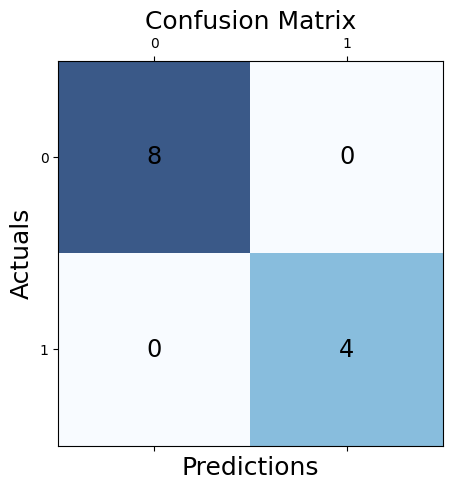

Confusion matrix for test set: 
 [[4 0]
 [0 2]]


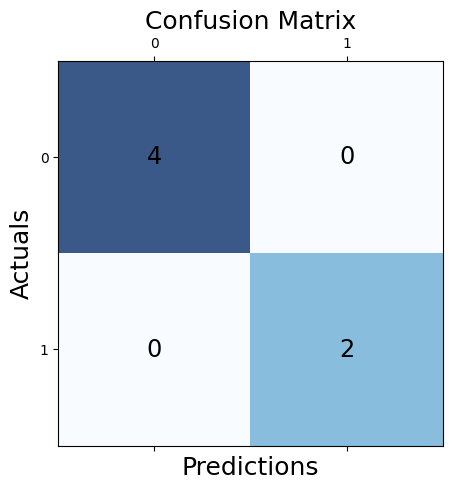

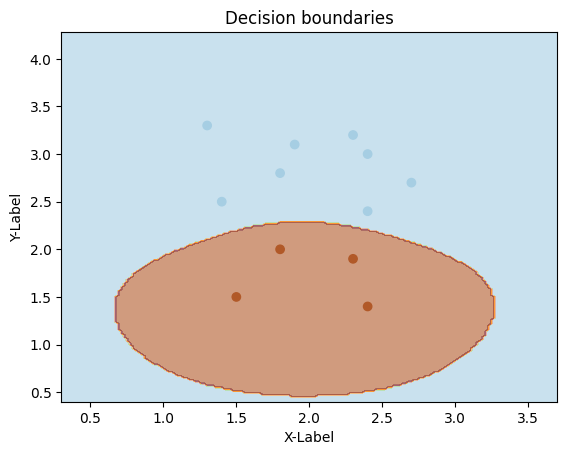


 For class : 2
Confusion matrix for training set: 
 [[8 0]
 [0 4]]


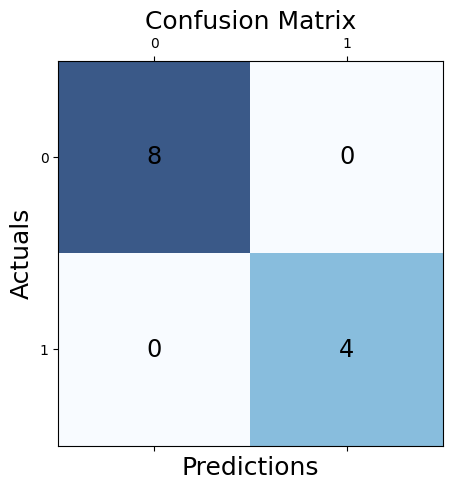

Confusion matrix for test set: 
 [[4 0]
 [1 1]]


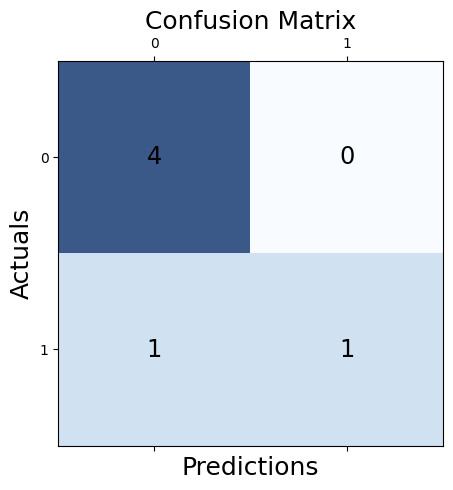

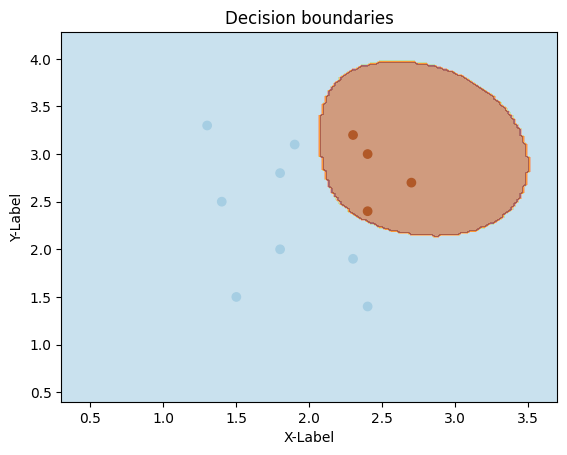

In [ ]:
i = 0
for i in range(3):
  print('\n For class :', i)
  OvR_svm(define_target_class(Y_Train,i), define_target_class(Y_Test,i))
  i+=1

#**(b-2) One-vs-Rest Perceptron**


##**Applying one-vs-rest strategy for perceptron, obtain and visualize confusion matrix and decision boundary**

In [ ]:
def perceptron_ovr(Y_Train, Y_Test):
  # Define the one-vs-rest Perceptron classifier with default parameters
  perceptron_ovr = linear_model.Perceptron()
  # Train the one-vs-rest Perceptron classifier using the training dataset
  ovr_perceptron = perceptron_ovr.fit(X_Train, Y_Train)
  # Predict the classes of the training and test datasets using the one-vs-rest Perceptron classifier
  Y_Train_Pred_Perceptron_OVR = perceptron_ovr.predict(X_Train)
  Y_Test_Pred_Perceptron_OVR = perceptron_ovr.predict(X_Test)

  # Calculate the confusion matrices for the training and test datasets using the one-vs-rest Perceptron classifier
  cm_train_perceptron_ovr = confusion_matrix(Y_Train, Y_Train_Pred_Perceptron_OVR)
  cm_test_perceptron_ovr = confusion_matrix(Y_Test, Y_Test_Pred_Perceptron_OVR)
  # Print the confusion matrices for the one-vs-rest Perceptron classifier
  print("Confusion matrix for training dataset (one-vs-rest Perceptron):")
  print(cm_train_perceptron_ovr)
  print("Confusion matrix for test dataset (one-vs-rest Perceptron):")
  print(cm_test_perceptron_ovr)
  conff_matrix(cm_train_perceptron_ovr)
  conff_matrix(cm_test_perceptron_ovr)
  plot_decision_boundary(ovr_perceptron,X_Train, Y_Train)
  return ovr_perceptron, Y_Train_Pred_Perceptron_OVR, Y_Test_Pred_Perceptron_OVR

For class: 0
Confusion matrix for training dataset (one-vs-rest Perceptron):
[[8 0]
 [0 4]]
Confusion matrix for test dataset (one-vs-rest Perceptron):
[[3 1]
 [0 2]]


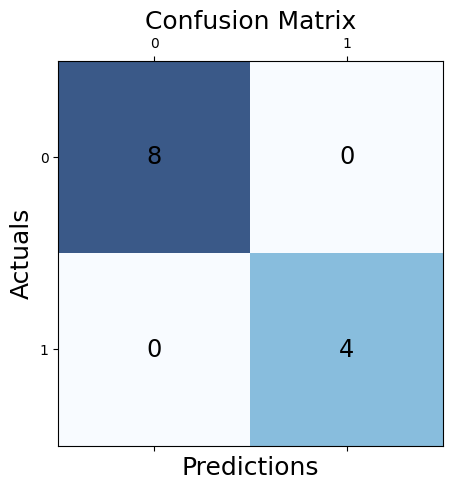

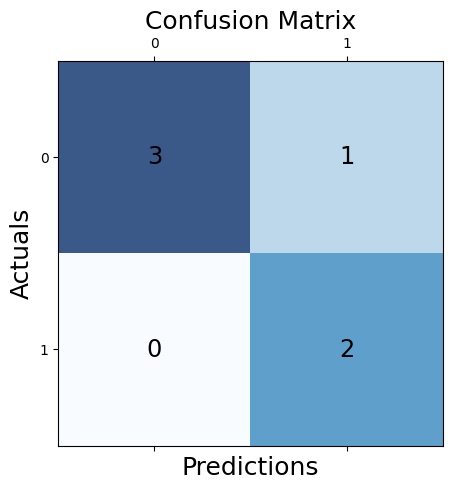

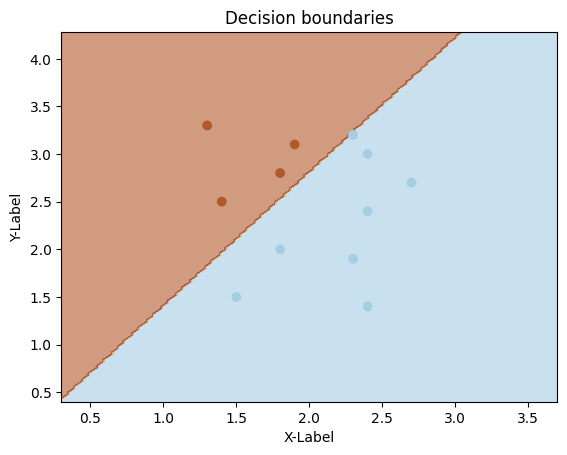

For class: 1
Confusion matrix for training dataset (one-vs-rest Perceptron):
[[8 0]
 [1 3]]
Confusion matrix for test dataset (one-vs-rest Perceptron):
[[4 0]
 [1 1]]


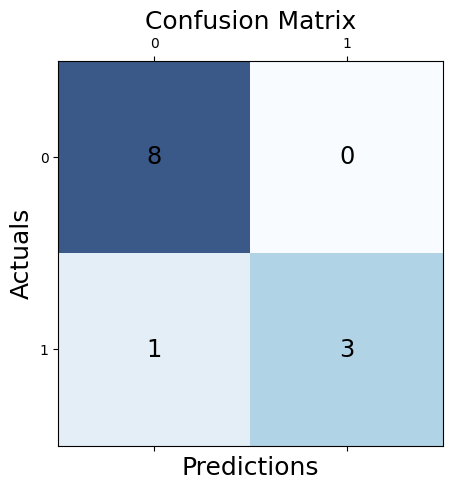

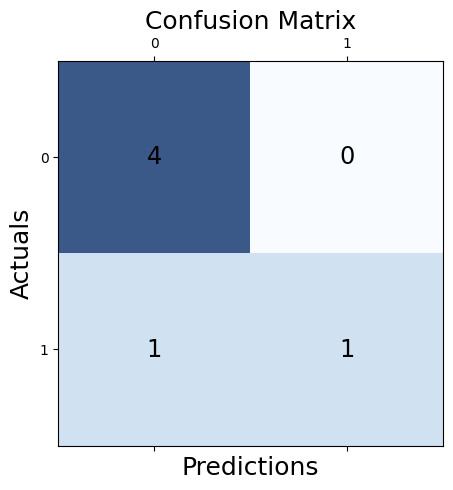

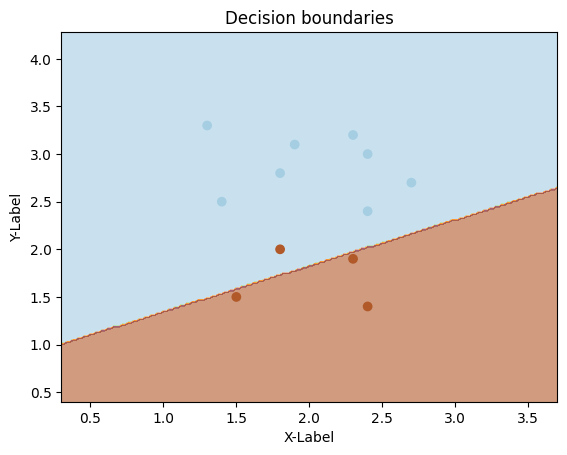

For class: 2
Confusion matrix for training dataset (one-vs-rest Perceptron):
[[0 8]
 [0 4]]
Confusion matrix for test dataset (one-vs-rest Perceptron):
[[0 4]
 [0 2]]


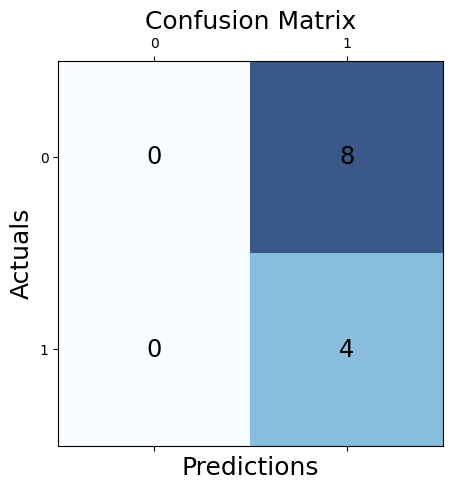

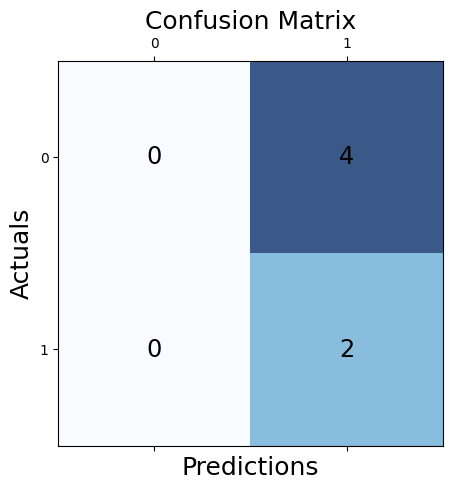

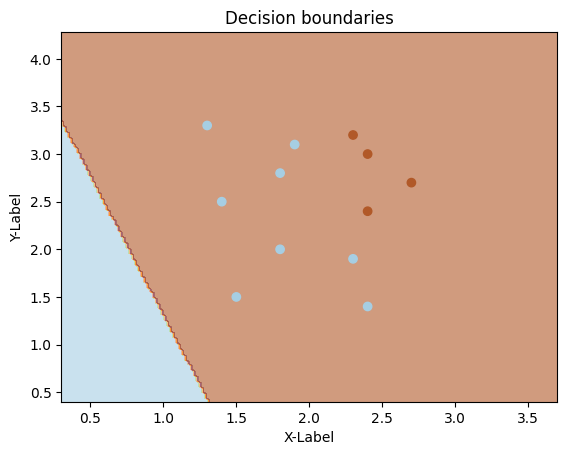

In [ ]:
i=0
per_clasifiers = []
Y_Train_ovr = []
Y_Test_ovr = []
for i in range(3):
  print("For class:",i)
  clf,train,test = perceptron_ovr(define_target_class(Y_Train,i), define_target_class(Y_Test,i))
  per_clasifiers.append(clf)
  Y_Train_ovr.append(train)
  Y_Test_ovr.append(test)

  i = i+1

In [ ]:
Y_Train_ovr = np.array(Y_Train_ovr)
Y_Test_ovr = np.array(Y_Test_ovr)

In [ ]:
y_Train_ovr_predict_output=[]
for i in range(Y_Train_ovr.shape[1]):
    col = Y_Train_ovr[:, i]
    argmax = np.argmax(col)
    y_Train_ovr_predict_output.append(argmax)
# Print the result
print(y_Train_ovr_predict_output)

[0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2]


In [ ]:
y_Test_ovr_predict_output = []
for i in range(Y_Test_ovr.shape[1]):
    col = Y_Test_ovr[:, i]
    argmax = np.argmax(col)
    y_Test_ovr_predict_output.append(argmax)
# Print the result
print(y_Test_ovr_predict_output)

[0, 0, 2, 1, 0, 2]


# **(c-1) Aggregate results from the one-vs-rest strategy for SVM**

In [ ]:
X_Train.shape

(12, 2)

# **Aggregation for training data**

In [ ]:
def agg_train ():
  prob_classes = []
  i=0
  for i in range(3):
    svm_model = svm.SVC(probability=True)
    OvR_clf = svm_model.fit(X_Train, define_target_class(Y_Train,i))
    svm_pred_y_test = OvR_clf.predict_proba(X_Train)
    # argmax_out = np.argmax(svm_pred_y_test)
    prob_classes.append((svm_pred_y_test))
    prob_classes1 = np.array(prob_classes)
    pred_classes = np.argmax(prob_classes1[:,:,1], axis=0)

  return pred_classes

In [ ]:
agg_train()

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

# **Aggregation for testing data**

In [ ]:
def agg_test ():
  prob_classes = []
  i=0
  for i in range(3):
    svm_model = svm.SVC(probability=True)
    OvR_clf = svm_model.fit(X_Test, define_target_class(Y_Test,i))
    svm_pred_y_test = OvR_clf.predict_proba(X_Test)
    # argmax_out = np.argmax(svm_pred_y_test)
    prob_classes.append((svm_pred_y_test))
    prob_classes1 = np.array(prob_classes)
    pred_classes = np.argmax(prob_classes1[:,:,1], axis=0)
  return pred_classes

In [ ]:
y = agg_test()
y.shape

(6,)

# **Visualize the decision surface for the aggregated SVM**

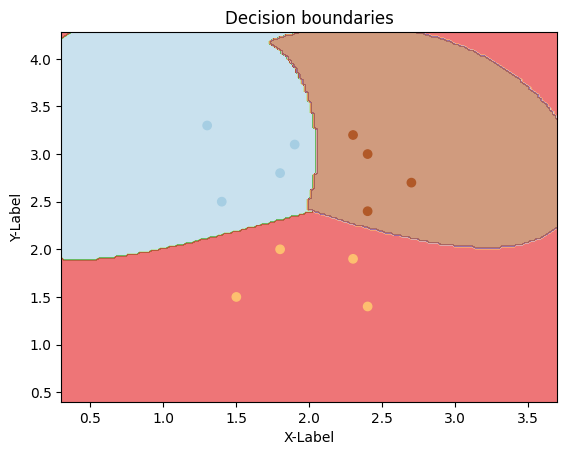

In [ ]:
# svm_model_agg = svm.SVC()
# svm_model_agg.fit(X_Train, y)

svm_model_agg = SVC()
svm_model_agg.fit(X_Train, agg_train())
# perceptron_ag = Perceptron()
# perceptron_ag.fit(x_train, perceptron_train_aggregate_result)

plot_decision_boundary(svm_model_agg, X_Train, agg_train())

# visualize_decision_surfaces(x_train, perceptron_train_aggregate_result, x_test, perceptron_test_aggregate_result,
# perceptron_ag, title='Perceptron aggregated predictions')

# **Obtainig and visualize confusion matrix for the aggregated SVM**

Confusion matrix for aggregation: 
 [[2 0 0]
 [0 0 2]
 [0 1 1]]


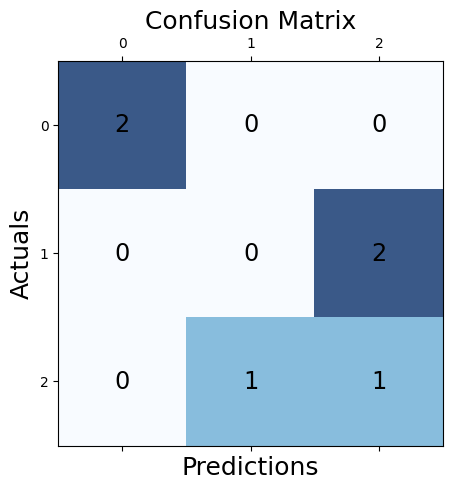

In [ ]:
# Predict the target output for the training and test data
conf_matrix = confusion_matrix(Y_Test, agg_test())
print("Confusion matrix for aggregation: \n", conf_matrix)
# ConfusionMatrixDisplay.from_estimator(svm_model, agg(), Y_Test)
# plot_decision_boundary(OvR_clf, agg(), Y_Test)
conff_matrix(conf_matrix)

Confusion matrix for aggregation: 
 [[4 0 0]
 [0 4 0]
 [0 0 4]]


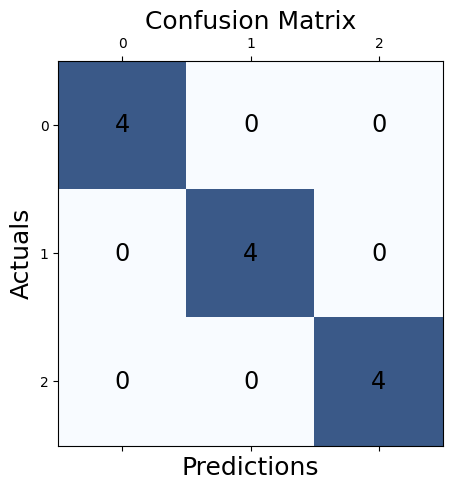

In [ ]:
# Predict the target output for the training and test data
conf_matrix = confusion_matrix(Y_Train, agg_train())
print("Confusion matrix for aggregation: \n", conf_matrix)
conff_matrix(conf_matrix)

#**(c) Aggregate results from the one-vs-rest strategy for Perceptron**

Aggregation results of training prediction: 
 [0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2]
Aggregation results of testing prediction: 
 [1. 1. 1. ... 2. 2. 2.]
Confusion matrix for training dataset (aggregated Perceptron):
[[4 0 0]
 [0 3 1]
 [0 0 4]]
Confusion matrix for test dataset (aggregated Perceptron):
[[2 0 0]
 [0 1 1]
 [1 0 1]]


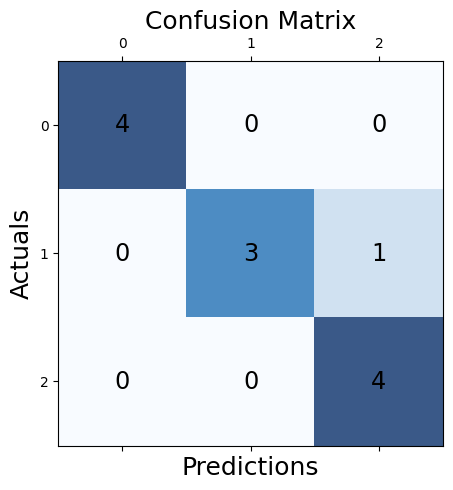

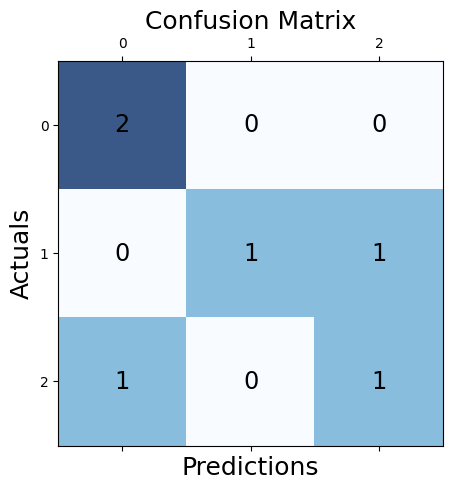

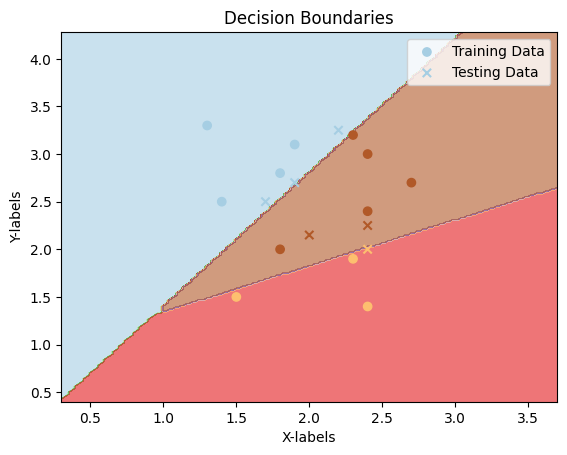

In [ ]:
y_Train_ovr_predict_output=[]
for i in range(Y_Train_ovr.shape[1]):
    col = Y_Train_ovr[:, i]
    argmax = np.argmax(col)
    y_Train_ovr_predict_output.append(argmax)
# Print the result
print('Aggregation results of training prediction: \n',y_Train_ovr_predict_output)

def plot_decision_boundary_ag(clfs, x_train, y_train, x_test, y_test):
  # Create a mesh grid to plot the decision boundary
  h = 0.02
  x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
  y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  predections = []
  for clf in clfs:
    pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    predections.append(pred)

  z_ag = np.zeros(len(predections[0]))
  for i in range(len(predections[0])):
      max_class_index = np.argmax([row[i] for row in predections])
      z_ag[i] = max_class_index


  # Print the result
  print('Aggregation results of testing prediction: \n', z_ag)


  Z = z_ag.reshape(xx.shape)
 # Calculate the confusion matrices for the training and test datasets using the one-vs-rest Perceptron classifier
  cm_train_perceptron_ovr = confusion_matrix(Y_Train, y_train)
  cm_test_perceptron_ovr = confusion_matrix(Y_Test, y_test)
  # Print the confusion matrices for the one-vs-rest Perceptron classifier
  print("Confusion matrix for training dataset (aggregated Perceptron):")
  print(cm_train_perceptron_ovr)
  print("Confusion matrix for test dataset (aggregated Perceptron):")
  print(cm_test_perceptron_ovr)
  conff_matrix(cm_train_perceptron_ovr)
  conff_matrix(cm_test_perceptron_ovr)

  # Plot the decision boundaries and the data points
  plt.contourf(xx, yy, Z,cmap=plt.cm.Paired,alpha=0.6)
  plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train,cmap=plt.cm.Paired,label='Training Data')
  plt.scatter(x_test[:, 0], x_test[:, 1], marker='x', c=y_test,cmap=plt.cm.Paired,label = 'Testing Data')
  plt.xlabel('X-labels')
  plt.ylabel('Y-labels')
  plt.title('Decision Boundaries')
  plt.legend()
  plt.show()

# Define Perceptron classifiers for aggregated predictions -------> per_clasifiers

# Visualize the decision surfaces for aggregated predictions on the train and test sets for perceptron

plot_decision_boundary_ag(per_clasifiers, X_Train, y_Train_ovr_predict_output, X_Test, y_Test_ovr_predict_output)

#**(d-1) Determine the reason why SVM performance in section (a) is different than aggregated performance of SVM in section (c)**

The aggregation in section (a) perform well with accuracy 100% than in section (c) as:
In section (a), The default SVM is a multi-classification which can handle problems with more than two classes and can provide more detailed information about the data than binary classification and generate 100% of accuracy.
In section (c), the aggregation applied for binary classifiers (c0, c1, c2), where the classes are not well-separated so the accuracy of the aggregation wasn't accurate as in multi-classification as shown in the confusion matrix.

#**(d-2) Refine the default SVM by selecting the appropriate parameter**

Best hyperparameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': 100}
Confusion matrix for training dataset:
 [[3 0 1]
 [0 4 0]
 [0 0 4]]
Confusion matrix for test dataset:
 [[2 0 0]
 [0 2 0]
 [0 0 2]]


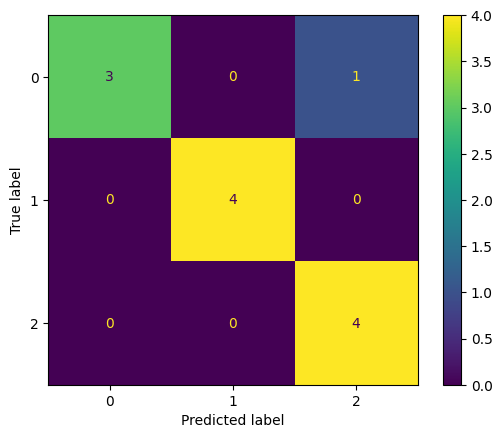

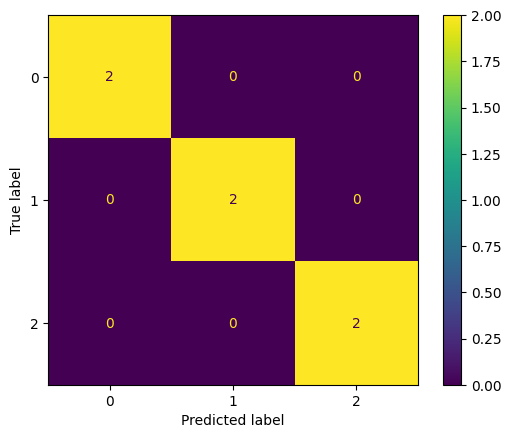

In [ ]:
# Refine

from sklearn.model_selection import GridSearchCV

# Define the SVM classifier
clf = svm.SVC()

# Define the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.1, 1, 10], 'max_iter': [100, 500, 1000]}

# Perform grid search to find the optimal hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_Train, Y_Train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Train the SVM classifier with the optimal hyperparameters
clf = svm.SVC(**grid_search.best_params_)
clf.fit(X_Train, Y_Train)

# Predict the target output for the training and test data
y_train_pred = clf.predict(X_Train)
y_test_pred = clf.predict(X_Test)

# Calculate the confusion matrices for the training and test datasets
confusion_matrix_train = confusion_matrix(Y_Train, y_train_pred)
confusion_matrix_test = confusion_matrix(Y_Test, y_test_pred)

# Print the confusion matrices
print("Confusion matrix for training dataset:\n",confusion_matrix_train)
# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_Train, Y_Train)
print("Confusion matrix for test dataset:\n",confusion_matrix_test)
# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_Test, Y_Test)

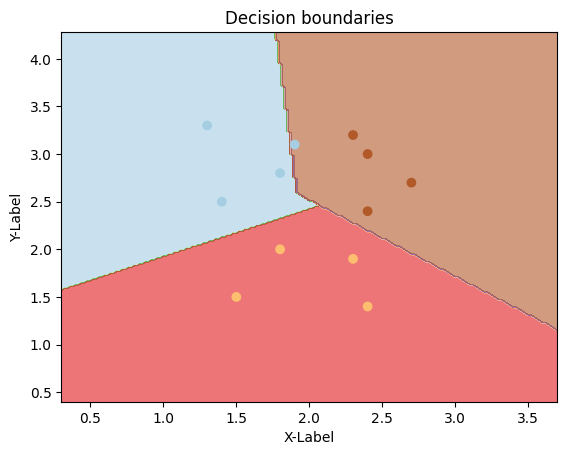

In [ ]:
# Display decision boundary
plot_decision_boundary(clf, X_Train, Y_Train)

#**Problem 2: KNN**

##**Install Necessary library**

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Import necessary libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import category_encoders as ce

##**a) Use python to implement this data preparation step.**

In [ ]:
#2(a)
# Load the dataset
data = pd.read_csv("/content/car_evaluation.csv")
col_names = ['Buying Price','Maintenance Cost','Doors','Persons','lug_boot','Safety','Decision']
data.columns = col_names
col_names
# Shuffle the dataset
shuffled_dataset = data.sample(frac=1, random_state=42)
print("Data After Shuffling:")
shuffled_dataset

Data After Shuffling:


,Buying Price,Maintenance Cost,Doors,Persons,lug_boot,Safety,Decision
599,high,high,4,2,big,low,unacc
932,med,vhigh,4,4,big,low,unacc
628,high,high,5more,2,big,high,unacc
1497,low,high,5more,4,med,med,acc
1262,med,low,4,more,med,low,unacc
...,...,...,...,...,...,...,...
1130,med,med,3,more,big,low,unacc
1294,med,low,5more,more,big,high,vgood
860,high,low,5more,more,big,low,unacc
1459,low,high,4,2,small,high,unacc


In [ ]:
#2(a)
# Split the dataset  into a training set with 1000 samples and a validation set with 300 samples and a testing set with 428
train_data, remaining_data = train_test_split(shuffled_dataset, train_size=1000, stratify=data['Decision'],random_state=42)
valid_data, test_data = train_test_split(remaining_data, train_size=300, stratify=remaining_data['Decision'],random_state=42)
print(" Training set = ",train_data.shape[0])
print(" Validation set = ",valid_data.shape[0])
print(" Testing set = ",test_data.shape[0])

# Split the dataset into training , validatin and testing sets
X_train =train_data.drop('Decision', axis=1)
y_train =train_data['Decision']
X_train_subset=valid_data.drop('Decision', axis=1)
y_train_subset=valid_data['Decision']
X_test=test_data.drop('Decision', axis=1)
y_test=test_data['Decision']

 Training set =  1000
 Validation set =  300
 Testing set =  427


In [ ]:
X_train

,Buying Price,Maintenance Cost,Doors,Persons,lug_boot,Safety
788,high,low,3,2,big,low
1251,med,low,4,4,small,med
1718,low,low,5more,more,small,low
1706,low,low,5more,2,big,low
1693,low,low,4,more,small,high
...,...,...,...,...,...,...
298,vhigh,med,5more,2,small,high
460,high,vhigh,3,2,small,high
893,med,vhigh,3,2,med,low
1144,med,med,4,4,small,high


In [ ]:
X_train_subset

,Buying Price,Maintenance Cost,Doors,Persons,lug_boot,Safety
1058,med,high,5more,2,big,low
418,vhigh,low,5more,4,med,high
1499,low,high,5more,4,big,low
1489,low,high,5more,2,med,high
1638,low,low,2,more,small,med
...,...,...,...,...,...,...
1191,med,low,2,2,med,med
135,vhigh,high,3,2,small,med
1527,low,med,2,4,big,med
708,high,med,4,2,big,med


In [ ]:
X_test

,Buying Price,Maintenance Cost,Doors,Persons,lug_boot,Safety
1195,med,low,2,2,big,high
763,high,low,2,2,big,high
179,vhigh,high,4,more,small,low
1029,med,high,4,2,med,med
760,high,low,2,2,med,high
...,...,...,...,...,...,...
1555,low,med,3,4,big,high
1072,med,high,5more,more,small,high
846,high,low,5more,4,small,med
356,vhigh,low,3,2,big,low


In [ ]:
y_train

788     unacc
1251      acc
1718    unacc
1706    unacc
1693     good
        ...  
298     unacc
460     unacc
893     unacc
1144      acc
12      unacc
Name: Decision, Length: 1000, dtype: object

In [ ]:
y_train_subset

1058    unacc
418       acc
1499    unacc
1489    unacc
1638    unacc
        ...  
1191    unacc
135     unacc
1527     good
708     unacc
1327    unacc
Name: Decision, Length: 300, dtype: object

In [ ]:
y_test

1195    unacc
763     unacc
179     unacc
1029    unacc
760     unacc
        ...  
1555    vgood
1072      acc
846     unacc
356     unacc
116     unacc
Name: Decision, Length: 427, dtype: object

##**b) Use python to implement this data preprocessing step.**

In [ ]:
#2(b)
buying = ['low', 'med', 'high', 'vhigh']
maintanance = ['low', 'med', 'high', 'vhigh']
doors = ['2', '3', '4', '5more']
persons = ['2', '4', 'more']
lug = ['small', 'med', 'big']
safety = ['low', 'med', 'high']
decision = ['unacc', 'acc', 'vgood', 'good']
all_values = [buying, maintanance, doors, persons, lug, safety]


le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train_subset = le.transform(y_train_subset)
y_test = le.transform(y_test)
oe=OrdinalEncoder()

encoder = ce.OrdinalEncoder(cols=["buying", "maintanance", "doors", "persons", "lug_boot", "safety"])
X_train = oe.fit_transform(X_train)
X_train_subset = oe.transform(X_train_subset)
X_test = oe.transform(X_test)

##**c) Size of training samples to show the impact of number of training samples**

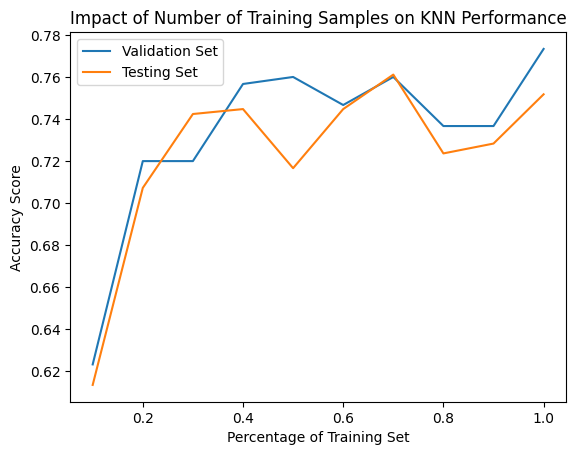

In [ ]:
# 2(c)
# Initialize lists to store the accuracy scores for validation and testing sets
val_scores = []
test_scores = []
# Define a list of percentages of the training set to use for each classifier
train_percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Iterate over each percentage and train a KNN classifier
for train_ratio in train_percentages:

    train_size = int(train_ratio * len(y_train))

    partial_X_train = X_train[:train_size]
    partial_y_train = y_train[:train_size]


    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(partial_X_train, partial_y_train)
    # Train the KNN classifier on the subset of training data
    #knn.fit(X_train, y_train)
    y_valid_pred=knn.predict(X_train_subset)
    y_test_pred=knn.predict(X_test)
    # Append the accuracy scores to the respective lists
    val_accuracy = accuracy_score(y_train_subset, y_valid_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    val_scores.append(val_accuracy)
    test_scores.append(test_accuracy)

# Plot the accuracy scores for validation and testing sets
plt.plot(train_percentages, val_scores, label='Validation Set')
plt.plot(train_percentages, test_scores, label='Testing Set')
plt.xlabel('Percentage of Training Set')
plt.ylabel('Accuracy Score')
plt.title('Impact of Number of Training Samples on KNN Performance')
plt.legend()
plt.show()

##**Use 100% of training samples, try to find the best K value, and show the accuracy curve on the validation set when K varies from 1 to 10**

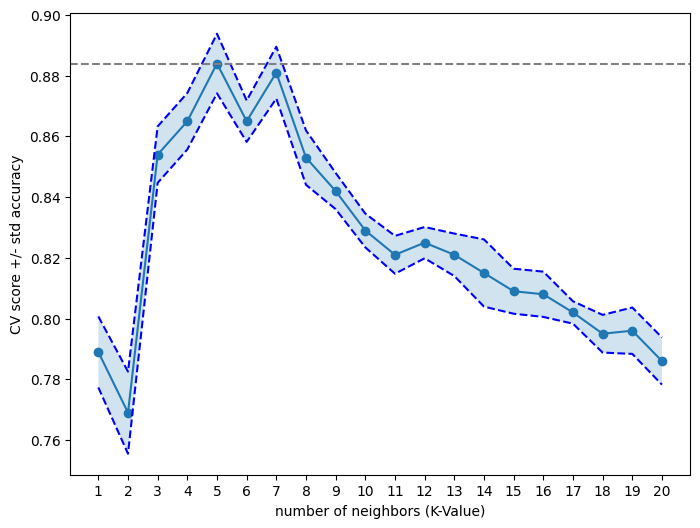

Test set score: 0.92
Final result of the model 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82        92
           1       0.91      0.59      0.71        17
           2       0.94      0.98      0.96       303
           3       1.00      0.67      0.80        15

    accuracy                           0.92       427
   macro avg       0.92      0.76      0.82       427
weighted avg       0.92      0.92      0.91       427



In [ ]:
#2(d)

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

n_neighbors = np.linspace(1, 20, 20, dtype=np.int32)
tuned_parameters = [{"n_neighbors": n_neighbors}]
knn = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
n_folds = 10
clf = GridSearchCV(knn, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

plt.figure().set_size_inches(8, 6)
plt.plot(n_neighbors, scores, marker="o")
std_error = scores_std / np.sqrt(n_folds)
plt.plot(n_neighbors, scores + std_error, "b--")
plt.plot(n_neighbors, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(n_neighbors, scores + std_error, scores - std_error, alpha=0.2)
# Show the plot
plt.ylabel("CV score +/- std accuracy")
plt.xlabel("number of neighbors (K-Value)")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xticks(n_neighbors)
plt.show()



cli = KNeighborsClassifier(n_neighbors=5)  ###
cli.fit(X_train, y_train)
y_pred = cli.predict(X_test)
print("Test set score: {:.2f}".format(cli.score(X_test, y_test)))
print("Final result of the model \n {}".format(classification_report(y_test, y_pred)))

##**#conclusions from the experiments of question (c) and (d)**

##**(2e) Based on the experiments conducted in questions (c) and (d)**
Based on the experiments conducted in questions (c) and (d), we can draw the following conclusions:

The performance of the KNN classifier generally improves as the size of the training set increases. This is because a larger training set provides more information for the classifier to learn from and can help to reduce overfitting.

The optimal value of K for the KNN classifier will depend on the specific dataset and problem you are working with. In our experiments in question (d), we found that the performance of the KNN classifier generally improved as K increased from 1 to around 5, and then decreased slightly as K continued to increase. However, the optimal value of K =5

It is important to carefully choose the size of the training set and the value of K for the KNN classifier